In [1]:
import cv2
import numpy as np
from skimage import morphology
import matplotlib.pyplot as plt

#### Question

Consider the following text image. Write your own algorithm (using image morphological operation) to locate the letter ‘e’ at different positions of this image.

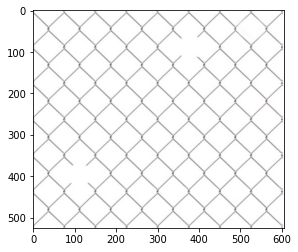

In [2]:
image = cv2.imread("images/fence.jpg")
plt.imshow(image,"gray")

#### Answer

In [3]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
gray_img.shape

(525, 605)

#### Convert to binary image and its complementary (inversion)

Text(0.5, 1.0, 'Inverted image')

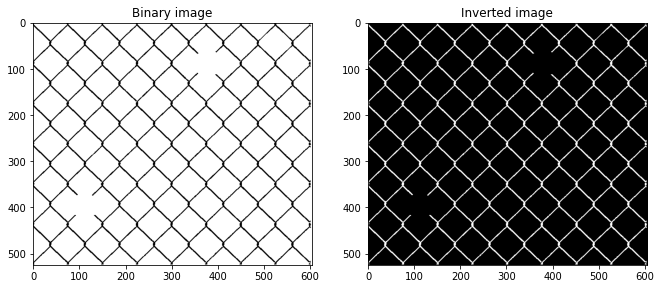

In [5]:
binr_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
invert_img = cv2.bitwise_not(binr_img)

plt.figure(figsize=(11, 17))
plt.subplot(121)
plt.imshow(binr_img,"gray")
plt.title("Binary image")
plt.subplot(122)
plt.imshow(invert_img,"gray")
plt.title("Inverted image")

### Hit-or-miss transformation

#### Extract the holes from the text to find the pattern, since the patterns have some difference need to find both

#### First cut: bottom left corner

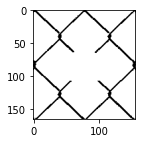

In [8]:
br_img_1 = binr_img[310:475, 35:190]
plt.figure(figsize=(2, 2))
plt.imshow(br_img_1,"gray")

In [9]:
br_img_1.shape

(165, 155)

#### Second cut: top right corner

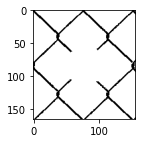

In [14]:
br_img_2 = binr_img[5:170, 300:455]
plt.figure(figsize=(2, 2))
plt.imshow(br_img_2,"gray")

In [15]:
br_img_2.shape

(165, 155)

#### Finding the left bottom corner cut: erode image with structure element

In [16]:
erosion_1 = cv2.erode(binr_img, br_img_1, iterations=1)

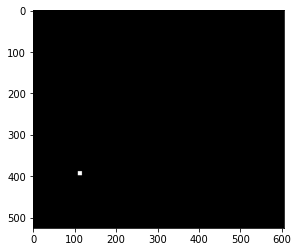

In [17]:
# after the erosion the positions of cut would be found but that should be dialated to be visible
kernel = np.ones((10, 10), np.uint8)
temp = cv2.dilate(erosion_1, kernel, iterations=1)
plt.imshow(temp,"gray")

#### Finding the top right corner cut: erode image with structure element

In [18]:
erosion_2 = cv2.erode(binr_img, br_img_2, iterations=1)

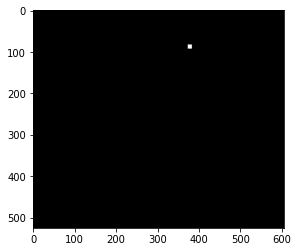

In [19]:
# after the erosion the positions of cut would be found but that should be dialated to be visible
kernel = np.ones((10, 10), np.uint8)
temp = cv2.dilate(erosion_2, kernel, iterations=1)
plt.imshow(temp,"gray")

Text(0.5, 1.0, 'Top Right Cut Location')

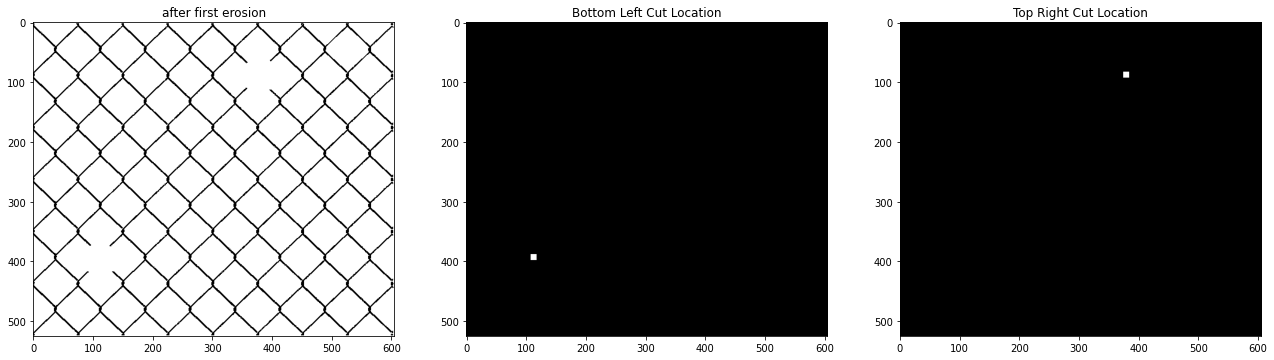

In [23]:
plt.figure(figsize=(22, 34))

plt.subplot(131)
plt.imshow(binr_img,"gray")
plt.title("after first erosion")

plt.subplot(132)
kernel = np.ones((10, 10), np.uint8)
temp = cv2.dilate(erosion_1, kernel, iterations=1)
plt.imshow(temp,"gray")
plt.title("Bottom Left Cut Location")

plt.subplot(133)
kernel = np.ones((10, 10), np.uint8)
temp = cv2.dilate(erosion_2, kernel, iterations=1)
plt.imshow(temp,"gray")
plt.title("Top Right Cut Location")
